In [1]:
import pandas as pd
import numpy as np

# To build a binary classifier using SVM, that will help us identify whether a given instance of flower is of the species 'versicolor'.
#reading input from csv file
iris_data = pd.read_csv("datasets/iris.csv")
iris_data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
#creating new column 'v_nv', to distinguish versicolor species from rest
#the below lambda function returns 0 for 'versicolor' species and returns 1 for rest.
v_nv_fn = lambda x: 0 if x=="versicolor" else 1
# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)
iris_data[iris_data['v_nv']==0].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
50,7.0,3.2,4.7,1.4,versicolor,0
51,6.4,3.2,4.5,1.5,versicolor,0
52,6.9,3.1,4.9,1.5,versicolor,0
53,5.5,2.3,4.0,1.3,versicolor,0
54,6.5,2.8,4.6,1.5,versicolor,0


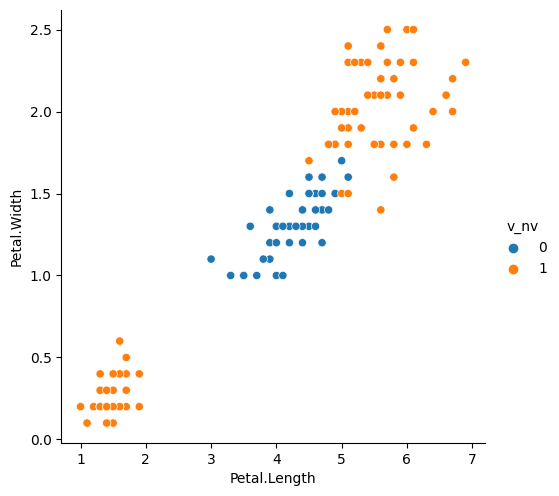

In [3]:
#visualization using seaborn - pairplot
import seaborn as sns
sns.pairplot(iris_data,
             x_vars = "Petal.Length",y_vars="Petal.Width",
             hue="v_nv",height=5)


In [ ]:
# In the above plot, you can find the separating hyperplane to classify data as versicolor and non-versicolor.
# You can observe that the data is not linearly separable i.e,
# it cannot be separated using a straight line. 

In [4]:
#Support Vector Classification
from sklearn.svm import SVC
#setting predictors and target
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["v_nv"]
# model building
model = SVC()
model.fit(X,Y)
model.score(X,Y)
# 0.9533333333333334


0.9533333333333334

C:\Users\aravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision boundary of SVM on iris data')

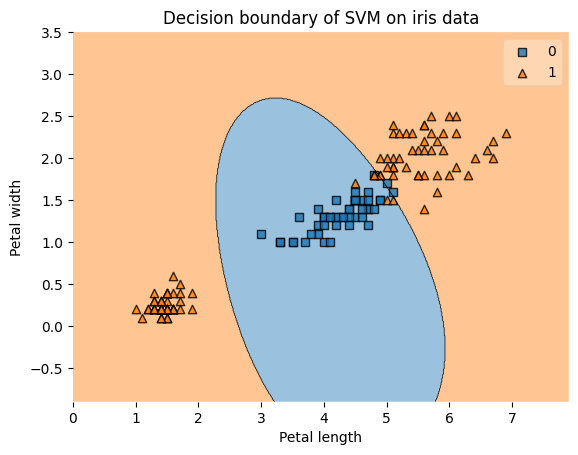

In [5]:
# A separating hyperplane that divides the iris dataset into versicolor and non-versicolor categories, looks as shown below.

# Note:'mlxtend' is another machine learning library and provides various useful tools for data science applications.

# Here, plot_decision_regions() function of mlxtend library is used for plotting the decision regions. 

import matplotlib.pyplot as plt 
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y).ravel()
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')


In [6]:
# The below demo shows the classification of Iris dataset 
# using SVM for multiple classes – setosa, versicolor and virginica.

# You can encode the species column with numerical values. And replace label 'setosa' with '0', 'versicolor' with '1' and 'virginica' with '2'. This encoding technique, 
# of converting distinct values of column into unique numbers is called 'label encoding'.

# encoding the species column
iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2
#data type (dtype) of the column will be converted to 'category'
iris_data.Species = iris_data.Species.astype("category") 
                           #https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html
iris_data.head()


# Building Model    
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["Species"]
model = SVC()
model.fit(X,Y)


SVC()

C:\Users\aravi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

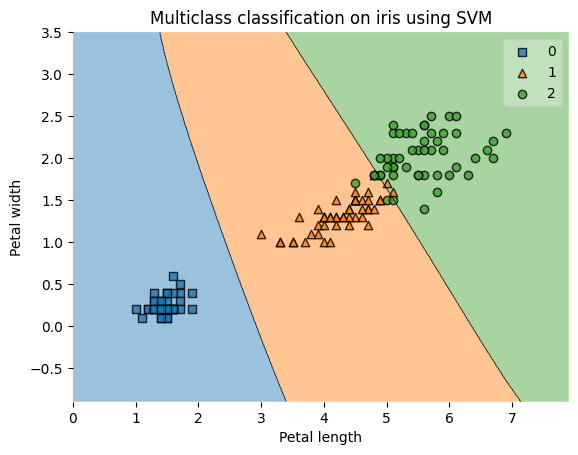

In [7]:
# Visualising the model
from mlxtend.plotting import plot_decision_regions
features = np.array(X)
target = np.array(Y)
plot_decision_regions(features,target,clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Multiclass classification on iris using SVM')
